In [1]:
import seaborn as sns

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [4]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13

# Данные

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Силами matplotlib

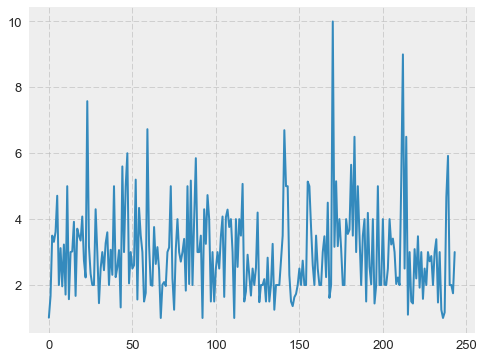

In [8]:
plt.plot(tips.tip); 
# то же, что и 
#plt.plot(range(len(tips.tip)), tips.tip);

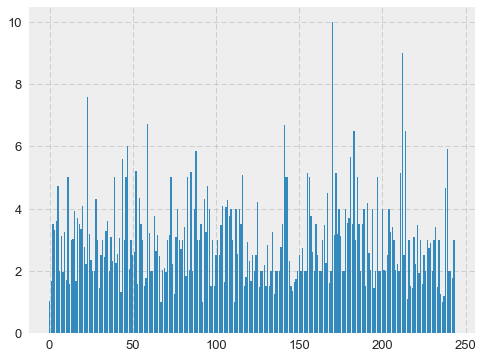

In [9]:
plt.bar(range(len(tips.tip)), tips.tip);

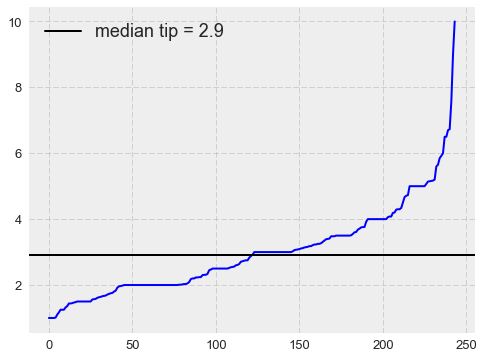

In [10]:
med = np.median(tips.tip)
plt.plot(sorted(tips.tip), c='b');
plt.axhline(y=med, label='median tip = %s' % med, c='black');
plt.legend(fontsize=18);

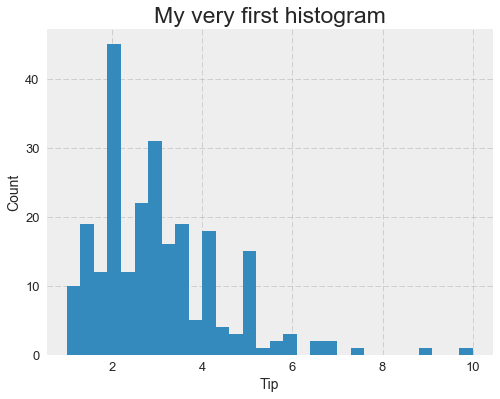

In [11]:
plt.hist(tips.tip, bins=30);
plt.title('My very first histogram');
plt.xlabel('Tip');
plt.ylabel('Count');

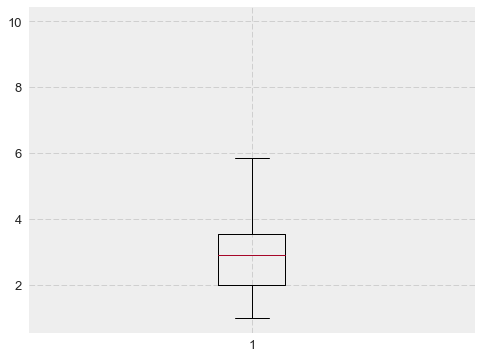

In [12]:
plt.boxplot(tips.tip);

<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Как читать boxplot?</h3> 
    </div>
</div>

<img src="images/boxplot.png" width="40%" align="left">

# Силами Pandas

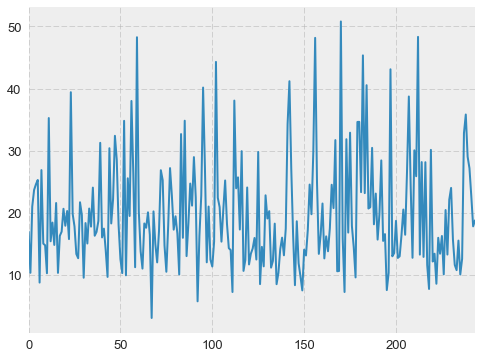

In [13]:
tips.total_bill.plot();

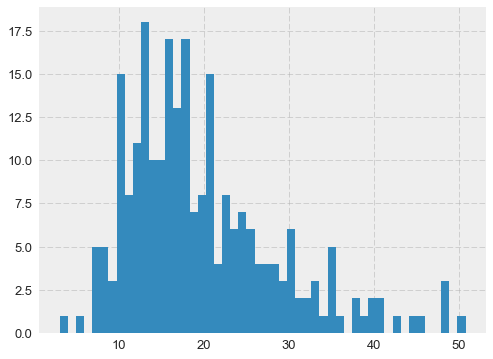

In [14]:
tips.total_bill.hist(bins=50);

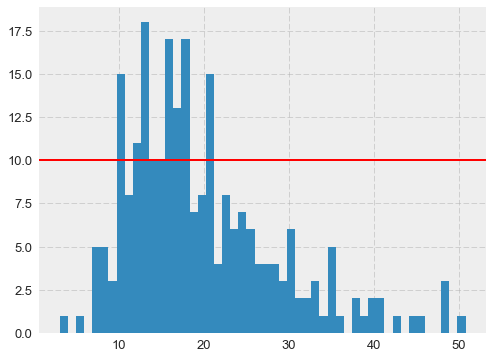

In [15]:
ax = plt.subplot()
plt.axhline(y=10, c='r');
tips.total_bill.hist(bins=50, ax=ax);

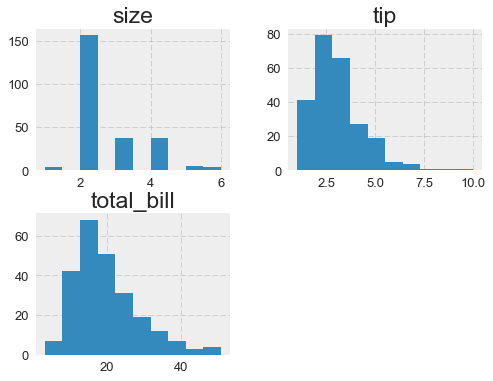

In [16]:
tips.hist();

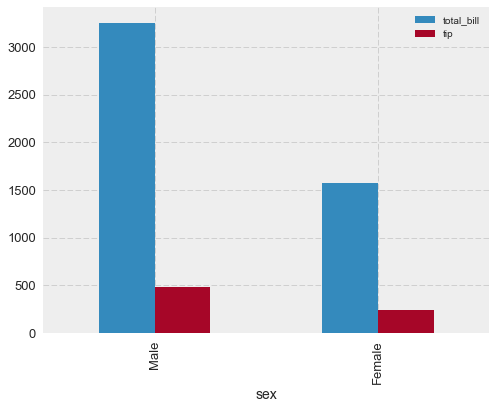

In [17]:
tips.groupby('sex').agg(sum)[['total_bill', 'tip']].plot(kind='bar');

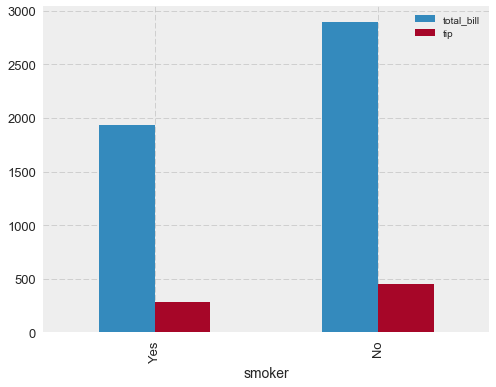

In [18]:
tips.groupby('smoker').agg(sum)[['total_bill', 'tip']].plot(kind='bar');

# Силами Seaborn

https://en.wikipedia.org/wiki/Kernel_density_estimation

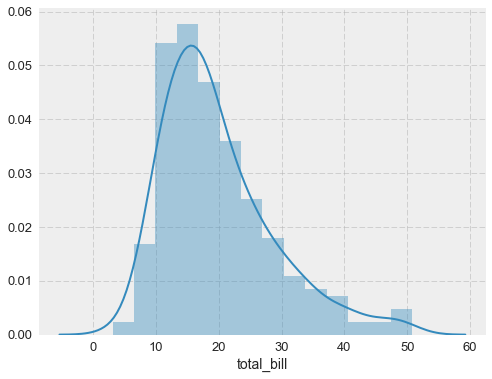

In [19]:
sns.distplot(tips.total_bill);

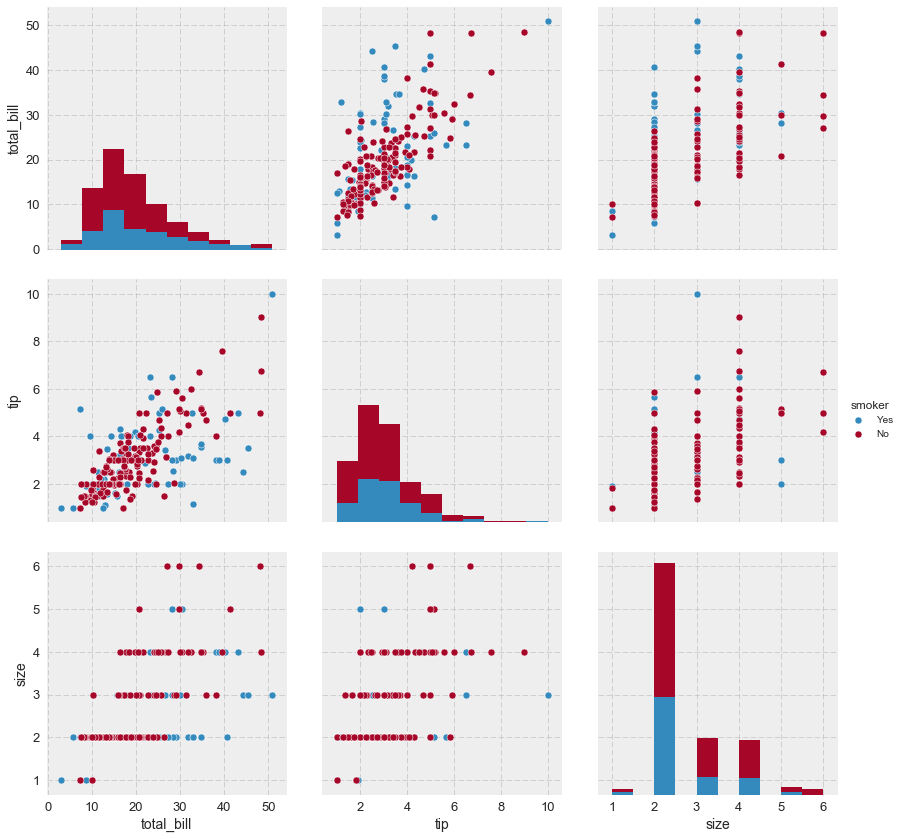

In [24]:
sns.pairplot(tips, hue='smoker', size=4);

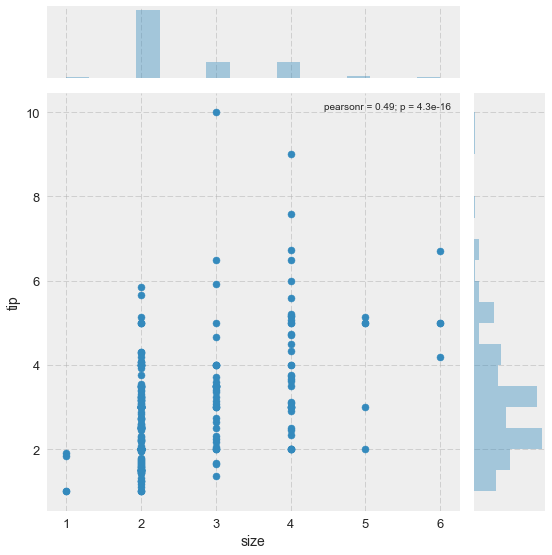

In [26]:
sns.jointplot(x='size', y='tip', data=tips, size=8);

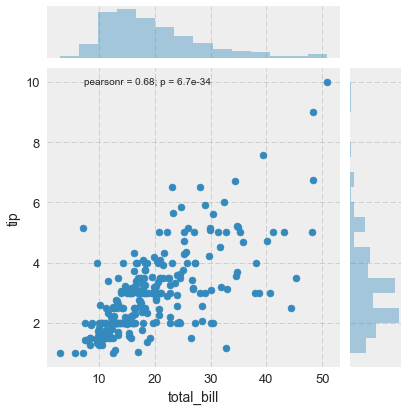

In [27]:
sns.jointplot(x='total_bill', y='tip', data=tips);

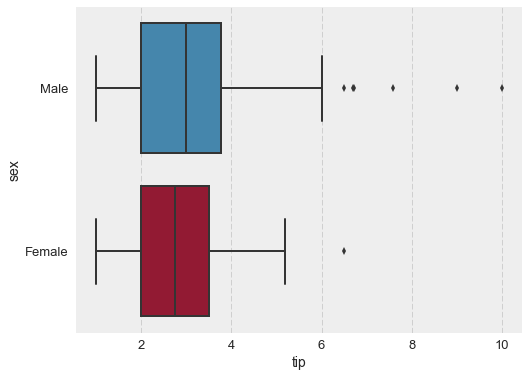

In [28]:
sns.boxplot(y="sex", x="tip", data=tips);

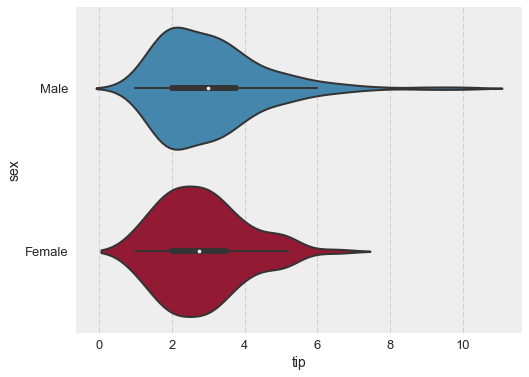

In [29]:
sns.violinplot(y="sex", x="tip", data=tips, orient='V');

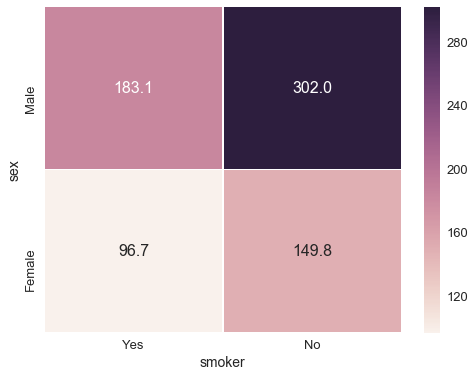

In [30]:
pivot = tips.pivot_table(index='sex', 
    columns='smoker', 
    values='tip', 
    aggfunc=sum).fillna(0).applymap(float)

sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5);

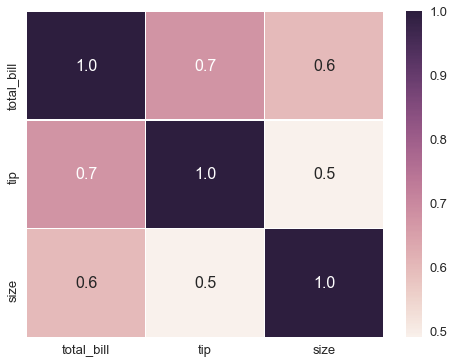

In [31]:
corr = tips.corr()

sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5);

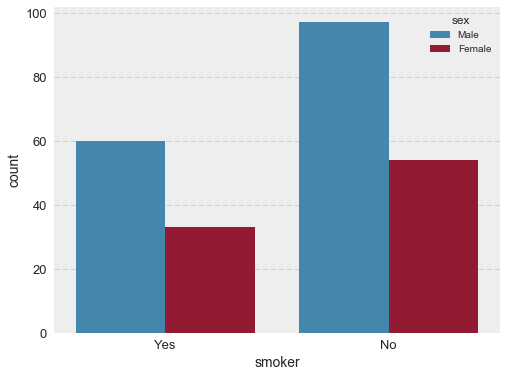

In [32]:
sns.countplot(x='smoker', data=tips, hue='sex');